# Spotify Data Collection

#### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Kerri Donaldson
#### Created: 4/19/21
#### Last Updated: 4/26/21
#### Data in Hand

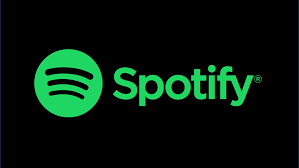

### Quick Overview

This report will go over data collected from the beginning of 2021 to 2020. The goal of this is to find out how much my music taste has changed and who I listen to the most. The question I have is "How has my music taste changed over the past year?" I collected my data from spotify to look at the song, the artist and the album that it came from. I will also need to find out the dates that the songs were listened to.

I also want to see what other data Spotify has collected about me like my name and when I created my account

###### Load in the required packages

In [101]:
import json
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [124]:
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\YourLibrary.json") as yl:
    yourlibrary = json.load(yl)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Userdata.json") as ud:
    userdata = json.load(ud)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory0.json", encoding = 'utf-8') as s:
    streaming = json.load(s)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory1.json") as s1:
    streaming1 = json.load(s1)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Identity.json") as i:
    identity = json.load(i)

I was able to pull from the data that I created this account in November of 2014(I was 13). 

They also had my profile picture but surprisingly they did not have my name recorded anywhere. I know that this is not useful but I thought it was cool.

In [103]:
print(userdata["creationTime"])

2014-11-15


In [104]:
print(identity["largeImageUrl"])

https://i.scdn.co/image/ab6775700000ee851f04b8f970ebefee78820879


I started by finding out if the information in the file was a dictionary or a list and then found the keys.

In [105]:
type(yourlibrary)

dict

In [106]:
yourlibrary.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'other'])

In [107]:
len(yourlibrary["tracks"])

91

In [108]:
type(yourlibrary["tracks"])

list

In [109]:
yourlibrary["tracks"][0:1000][0].keys()

dict_keys(['artist', 'album', 'track'])

In [132]:
len(streaming)

10000

In [133]:
streaming[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

In [110]:
len(streaming1)

1002

In [111]:
streaming1[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

#### Make data easier to read

I used pandas to create a table for the different data files.

In [112]:
pd.set_option('display.max_rows', 500)
likes = pd.DataFrame(yourlibrary["tracks"], columns=["artist", "album", "track"])
#likes.head(91)

artist                                            album  \
0             Jack Garratt                                            Phase   
1             Jack Garratt                                            Phase   
2                      TVA  Common Culture : A Compilation by Connor Franta   
3                   ODESZA     A Music Compilation by Connor Franta, Vol. I   
4      Panic! At The Disco                                       Hallelujah   
5      Andrew Lloyd Webber                         The Phantom Of The Opera   
6   The Kite String Tangle     A Music Compilation by Connor Franta, Vol. I   
7                       LP                                      Lost on You   
8             Charles Hart                         The Phantom Of The Opera   
9      Andrew Lloyd Webber                         The Phantom Of The Opera   
10     Andrew Lloyd Webber                         The Phantom Of The Opera   
11     Andrew Lloyd Webber                         The Phantom Of The Opera   
12              The Erised  Common Culture : A Compilation by Connor Franta   
13                      LP                                      Lost on You   
14     Andrew Lloyd Webber                         The Phantom Of The Opera   
15            Manicanparty     A Music Compilation by Connor Franta, Vol. I   
16                      LP                                      Lost on You   
17            Jack Garratt                                            Phase   
18                Aly & AJ                                      Insomniatic   
19                      LP                                      Lost on You   
20            Jack Garratt                                            Phase   
21                      LP                                      Lost on You   
22     Andrew Lloyd Webber                         The Phantom Of The Opera   
23            Jack Garratt                                            Phase   
24            Andy Grammer                              Magazines Or Novels   
25                Lolawolf                                   Everyfuckinday   
26                      LP                                      Lost on You   
27            Jack Garratt                                            Phase   
28                     Wet     A Music Compilation by Connor Franta, Vol. I   
29              Cathedrals                                    Cathedrals EP   
30               Zella Day     A Music Compilation by Connor Franta, Vol. I   
31     Andrew Lloyd Webber                         The Phantom Of The Opera   
32         Trails and Ways  Common Culture : A Compilation by Connor Franta   
33                      LP                                      Lost on You   
34             Alice Boman                             EP II (+ Skisser EP)   
35     Andrew Lloyd Webber                         The Phantom Of The Opera   
36                  Grimes     A Music Compilation by Connor Franta, Vol. I   
37                mansionz                                         Mansionz   
38     Andrew Lloyd Webber                         The Phantom Of The Opera   
39                  MARINA                                    Electra Heart   
40            New Politics                             A Bad Girl In Harlem   
41                SAYGRACE                                             Memo   
42            Jack Garratt                                            Phase   
43              Mambo King                            Chihuahua Number Five   
44            Jack Garratt                                            Phase   
45     Andrew Lloyd Webber                         The Phantom Of The Opera   
46            Jack Garratt                                            Phase   
47            Jack Garratt                                            Phase   
48                      LP                                      Lost on You   
49          Panama Wedding  Common Culture : A Compilation by Connor F

In [136]:
pd.set_option('display.max_rows', 10000000000)
songs = pd.DataFrame(streaming, columns=["endTime", "artistName", "trackName", "msPlayed"])
#songs.head(10001)

endTime                                         artistName  \
0     2020-02-21 20:52                                     Chelsea Cutler   
1     2020-02-21 20:56                                         Joni Payne   
2     2020-02-21 20:59                                        Marian Hill   
3     2020-02-21 21:02                                        Transviolet   
4     2020-02-21 21:02                                                Wet   
5     2020-02-21 21:06                                     Chase Atlantic   
6     2020-02-21 21:10                                         The Weeknd   
7     2020-02-21 21:14                                              JONES   
8     2020-02-21 21:20                                               PLTO   
9     2020-02-21 21:24                                   Sofi de la Torre   
10    2020-02-21 21:28                                    Olivver the Kid   
11    2020-02-21 21:28                                    Olivver the Kid   
12    2020-02-21 21:32                                      Hayley Kiyoko   
13    2020-02-21 21:36                                             Kiiara   
14    2020-02-21 21:37                                       Emily Vaughn   
15    2020-03-07 17:52                                     Kendrick Lamar   
16    2020-03-07 17:56                                           The Game   
17    2020-03-07 17:56                                           Yeasayer   
18    2020-03-07 17:56                                             Wavves   
19    2020-03-07 17:56                                              Oh No   
20    2020-03-07 17:57                                        Twin Shadow   
21    2020-03-07 17:59                                        Jack Harlow   
22    2020-03-07 18:01                                        Jack Harlow   
23    2020-03-07 18:04                                        Jack Harlow   
24    2020-03-07 18:08                                        Jack Harlow   
25    2020-03-07 18:11                                        Jack Harlow   
26    2020-03-07 18:13                                        Jack Harlow   
27    2020-03-07 18:15                                        Jack Harlow   
28    2020-03-07 18:19                                        Jack Harlow   
29    2020-03-07 18:24                                        Jack Harlow   
30    2020-03-07 18:25                                        Jack Harlow   
31    2020-03-15 16:07                                   Sofi de la Torre   
32    2020-03-15 16:11                                               JOY.   
33    2020-03-15 16:11                                                Wet   
34    2020-03-15 16:13                                          blackbear   
35    2020-03-15 16:16                                         Joni Payne   
36    2020-03-15 16:22                                           The 1975   
37    2020-03-15 16:25                                         Tim Legend   
38    2020-03-15 16:25                                        Alan Walker   
39    2020-03-15 16:28                                        Gavin James   
40    2020-03-15 16:32                                                Nao   
41    2020-03-15 18:23                                      Hayley Kiyoko   
42    2020-03-15 18:28                                              BØRNS   
43    2020-03-15 18:31                                        Lostboycrow   
44    2020-03-15 18:35                                              BØRNS   
45    2020-03-15 18:37                                              TRACE   
46    2020-03-15 18:41                                             VÉRITÉ   
47    2020-03-15 18:44                                    Hippie Sabotage   
48    2020-03-15 18:47                                         Charli XCX   
49    2020-03-15 18:51                                               ZAYN   
50    2020-03-15 18:53                                      Annabel Jones   
51    2020-

In [140]:
pd.set_option('display.max_rows', 10000000000)
songs1 = pd.DataFrame(streaming1, columns=["endTime", "artistName", "trackName", "msPlayed"])
#songs1.head(1002)

I narrowed down the columns so it will be easier to work with.

In [116]:
yourlibrary_df = pd.DataFrame(yourlibrary['tracks'], columns = ['artist', 'track'])
#yourlibrary_df

artist                                       track
0             Jack Garratt                                   Weathered
1             Jack Garratt                                     Falling
2                      TVA                                     Sensual
3                   ODESZA                                 Say My Name
4      Panic! At The Disco                                  Hallelujah
5      Andrew Lloyd Webber                                   Entr'Acte
6   The Kite String Tangle                                     Arcadia
7                       LP                               Up Against Me
8             Charles Hart                               Magical Lasso
9      Andrew Lloyd Webber   Down Once More / Track Down This Murderer
10     Andrew Lloyd Webber                            All I Ask Of You
11     Andrew Lloyd Webber    I Remember / Stranger Than You Dreamt It
12              The Erised                                        Pray
13                      LP                                  No Witness
14     Andrew Lloyd Webber           Wandering Child / Bravo, Monsieur
15            Manicanparty                            It's In Her Eyes
16                      LP                                   Tightrope
17            Jack Garratt                                Breathe Life
18                Aly & AJ                      Potential Breakup Song
19                      LP                                     Strange
20            Jack Garratt                                    Chemical
21                      LP                                Muddy Waters
22     Andrew Lloyd Webber                  All I Ask Of You - Reprise
23            Jack Garratt                           Surprise Yourself
24            Andy Grammer                            Honey, I'm Good.
25                Lolawolf                                   House Key
26                      LP                                   Suspicion
27            Jack Garratt                                    Remnants
28                     Wet                             You're the Best
29              Cathedrals                                      Harlem
30               Zella Day                                East of Eden
31     Andrew Lloyd Webber                Why Have You Brought Me Here
32         Trails and Ways                                       Nunca
33                      LP                                Death Valley
34             Alice Boman                                     Waiting
35     Andrew Lloyd Webber                      The Music Of The Night
36                  Grimes                                          Go
37                mansionz                            Rich White Girls
38     Andrew Lloyd Webber  Little Lotte / The Mirror (Angel Of Music)
39                  MARINA                             Bubblegum Bitch
40            New Politics                                      Harlem
41                SAYGRACE             You Don't Own Me (feat. G-Eazy)
42            Jack Garratt                       The Love You're Given
43              Mambo King                                  Mambo N. 5
44            Jack Garratt                  I Couldn't Want You Anyway
45     Andrew Lloyd Webber                         Notes / Prima Donna
46            Jack Garratt                             Lonesome Valley
47            Jack Garratt                        I Know All What I Do
48                      LP                                 Switchblade
49          Panama Wedding                                       Trust
50            Jack Garratt               Coalesce (Synesthesia Pt. II)
51     Andrew Lloyd Webber                    The Phantom Of The Opera
52               Coucheron                                    Deep End
53            Jack Garratt                            Water - Acoustic
54     Andrew Lloyd Webber                                 Think Of Me
55     Andrew Lloyd Webber                  

In [117]:
count_yourlibrary_df = yourlibrary_df.groupby('artist').count()
#count_yourlibrary_df

track
artist                       
AJR                         1
Alice Boman                 1
Allie X                     1
Aly & AJ                    1
Andrew Lloyd Webber        20
Andy Grammer                1
Atlas Genius                1
Betty Who                   1
Black Eyed Peas             1
Cartel                      1
Cathedrals                  1
Charles Hart                1
Coucheron                   1
Dead Times                  1
Glass Animals               1
Grimes                      1
High Highs                  1
Jack Garratt               19
LP                         13
Lloyd Banks                 1
Lolawolf                    1
MARINA                      1
Mambo King                  1
Manicanparty                1
Nao                         1
New Politics                1
ODESZA                      1
One Direction               1
Panama Wedding              1
Panic! At The Disco         1
Quinn XCII                  1
SAYGRACE                    2
Sammy Adams                 1
TVA                         1
The Erised                  1
The Kite String Tangle      1
The Ready Set               1
Trails and Ways             1
Wet                         1
Zella Day                   1
mansionz                    1

In [146]:
count_yourlibrary_df.sort_values(["track"], axis=0, ascending=True, inplace=True)
#count_yourlibrary_df

track
artist                       
AJR                         1
Mambo King                  1
Manicanparty                1
Nao                         1
New Politics                1
ODESZA                      1
One Direction               1
Panama Wedding              1
MARINA                      1
Panic! At The Disco         1
Sammy Adams                 1
TVA                         1
The Erised                  1
The Kite String Tangle      1
The Ready Set               1
Trails and Ways             1
Wet                         1
Quinn XCII                  1
Zella Day                   1
Lolawolf                    1
Black Eyed Peas             1
Alice Boman                 1
Allie X                     1
Aly & AJ                    1
Andy Grammer                1
Atlas Genius                1
Betty Who                   1
Lloyd Banks                 1
Cartel                      1
mansionz                    1
Charles Hart                1
Coucheron                   1
Dead Times                  1
Glass Animals               1
Grimes                      1
High Highs                  1
Cathedrals                  1
SAYGRACE                    2
LP                         13
Jack Garratt               19
Andrew Lloyd Webber        20

In [138]:
count_streaming_df = pd.DataFrame(streaming, columns = ['artistName', 'trackName'])
#streaming_df

artistName  \
0                                        Chelsea Cutler   
1                                            Joni Payne   
2                                           Marian Hill   
3                                           Transviolet   
4                                                   Wet   
5                                        Chase Atlantic   
6                                            The Weeknd   
7                                                 JONES   
8                                                  PLTO   
9                                      Sofi de la Torre   
10                                      Olivver the Kid   
11                                      Olivver the Kid   
12                                        Hayley Kiyoko   
13                                               Kiiara   
14                                         Emily Vaughn   
15                                       Kendrick Lamar   
16                                             The Game   
17                                             Yeasayer   
18                                               Wavves   
19                                                Oh No   
20                                          Twin Shadow   
21                                          Jack Harlow   
22                                          Jack Harlow   
23                                          Jack Harlow   
24                                          Jack Harlow   
25                                          Jack Harlow   
26                                          Jack Harlow   
27                                          Jack Harlow   
28                                          Jack Harlow   
29                                          Jack Harlow   
30                                          Jack Harlow   
31                                     Sofi de la Torre   
32                                                 JOY.   
33                                                  Wet   
34                                            blackbear   
35                                           Joni Payne   
36                                             The 1975   
37                                           Tim Legend   
38                                          Alan Walker   
39                                          Gavin James   
40                                                  Nao   
41                                        Hayley Kiyoko   
42                                                BØRNS   
43                                          Lostboycrow   
44                                                BØRNS   
45                                                TRACE   
46                                               VÉRITÉ   
47                                      Hippie Sabotage   
48                                           Charli XCX   
49                                                 ZAYN   
50                                        Annabel Jones   
51                                                Jetta   
52                                                 MUNA   
53                                           Joni Payne   
54                                         Emily Vaughn   
55                                          Troye Sivan   
56                                               G-Eazy   
57                                               Dreezy   
58                                                 dvsn   
59                                                 MIIA   
60                                      Olivver the Kid   
61                                      Mr Little Jeans   
62                                                Foxes   
63                                              Danrell   
64                                        Billie Eilish   
65                                                  Wet   
66                                            Tessa Rae   
67                               

In [139]:
count_streaming_df = streaming_df.groupby('artistName').count()
#count_streaming_df

trackName
artistName                                                   
$NOT                                                        2
12AM                                                        1
14KT                                                        1
1990nowhere                                                 5
24hrs                                                       6
2forwOyNE                                                   3
3 Doors Down                                                3
30                                                         20
4 Non Blondes                                               3
44phantom                                                  41
7715                                                       19
99 Neighbors                                               36
A L E X                                                     1
ADHDS                                                       1
AFI                                                         4
AJR                                                         1
ALWAYS PROPER                                               1
AMAG                                                        1
ASL                                                         7
ASTN                                                       46
ASTR                                                        3
ATM Curly                                                  15
ATO                                                         2
Aaron Taos                                                  1
Aaryn Doyle                                                 2
Abhi The Nomad                                             42
Abigail Barlow                                              2
Active Child                                                2
Adele                                                       7
Aeris Roves                                                 1
Aerosmith                                                   2
Aether                                                      1
Agent Blue                                                  1
Aiguille                                                    1
Ajmw                                                        1
Alan Jackson                                                3
Alan Walker                                                10
Alanis Morissette                                           1
Alec Beretz                                                 1
Alec King                                                  40
Alessia Cara                                               33
Alex Young ∞                                                1
Alexander 23                                               16
Alexander Vincent                                          10
Alice Boman                                                 1
Alice In Chains                                             2
Alison Wonderland                                           1
All Time Low                                                3
All the Rest                                               46
Allem Iversom                                               2
Allie X                                                     1
Almondmilkhunni                                             1
AlunaGeorge                                                 1
Always Never                                                1
Aly & AJ                                                    2
Amalon                                                      1
Amber Run                                                   1
Amel Larrieux                                               3
American Dead Cross                                         2
Amir Obe                                                   39
Andrea Russett                                              2
Andrew Stephen                                              1
Andy Grammer                                                1
Angelo Mota           

In [144]:
count_streaming_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
#count_streaming_df

trackName
artistName                                                   
Łaszewo                                                     1
Fitz and The Tantrums                                       1
Otesla                                                      1
Fickle Friends                                              1
Owl City                                                    1
P!nk                                                        1
Felicity                                                    1
Papa Roach                                                  1
Park Bird                                                   1
Parmalee                                                    1
FIELDS                                                      1
Ezzy                                                        1
Evil Needle                                                 1
Oscar Scheller                                              1
Paul Butcher                                                1
Europe                                                      1
Ethan DeRose                                                1
Eric Clapton                                                1
Eric Church                                                 1
Phillip Larue                                               1
Phillip Phillips                                            1
Photocomfort                                                1
Emapea                                                      1
Pink Slip                                                   1
Elskavon                                                    1
Pitbull                                                     1
Elliphant                                                   1
Evalyn                                                      1
Flitz&Suppe                                                 1
Flo Rida                                                    1
Omaure                                                      1
Goldilox                                                    1
Go Radio                                                    1
Glimlip                                                     1
MxPx                                                        1
Mýa                                                         1
NAV                                                         1
George Fields                                               1
NF                                                          1
NLE Choppa                                                  1
Ne-Yo                                                       1
Nelly                                                       1
Nelly Furtado                                               1
Niall Horan                                                 1
GRACE                                                       1
Nick Jonas                                                  1
Njomza                                                      1
No Spirit                                                   1
No Wyld                                                     1
Noah Cunane                                                 1
Nokiaa                                                      1
Four Tet                                                    1
Noosa                                                       1
Oasis                                                       1
Of Monsters and Men                                         1
Oh No                                                       1
Olivia Lunny                                                1
Florrie                                                     1
Pjpoppy                                                     1
Gonza                                                       1
Ella Vos                                                    1
Elijah Noll                                                 1
Derek Pope                                                  1
Ronny J               

In [128]:
streaming1_df = pd.DataFrame(streaming1, columns = ['artistName', 'trackName'])
#streaming1_df

artistName                                     trackName
0                     Caye                                        Happy?
1                     Boon                                i might like u
2            Baltazar Lora                          Her Name Is Midnight
3              Ben Kessler                                      Concrete
4                   Payday                                          Beam
5               Blake Yung                      Wildflower (ft. MOD SUN)
6            Charles Goose                                       my song
7              John Tucker                                        Rewind
8           Jefferson Clay                          Do I Go Down Smooth?
9                   PichÃ©                       Euphoria and Nosebleeds
10               Nick Hall                                    FAST TRACK
11                 Artemas                                      High 4 U
12                    Caye                                        Happy?
13                    Boon                                i might like u
14           Baltazar Lora                          Her Name Is Midnight
15             Ben Kessler                                      Concrete
16                  Payday                                          Beam
17              Blake Yung                      Wildflower (ft. MOD SUN)
18           Charles Goose                                       my song
19             John Tucker                                        Rewind
20          Jefferson Clay                          Do I Go Down Smooth?
21                  PichÃ©                       Euphoria and Nosebleeds
22               Nick Hall                                    FAST TRACK
23                 Artemas                                      High 4 U
24                    Caye                                        Happy?
25                    Boon                                i might like u
26           Baltazar Lora                          Her Name Is Midnight
27             Ben Kessler                                      Concrete
28                  Payday                                          Beam
29              Blake Yung                      Wildflower (ft. MOD SUN)
30           Charles Goose                                       my song
31             John Tucker                                        Rewind
32          Jefferson Clay                          Do I Go Down Smooth?
33                  PichÃ©                       Euphoria and Nosebleeds
34               Nick Hall                                    FAST TRACK
35                 Artemas                                      High 4 U
36                    Caye                                        Happy?
37                    Boon                                i might like u
38           Baltazar Lora                          Her Name Is Midnight
39             Ben Kessler                                      Concrete
40                  Payday                                          Beam
41              Blake Yung                      Wildflower (ft. MOD SUN)
42           Charles Goose                                       my song
43             John Tucker                                        Rewind
44          Jefferson Clay                          Do I Go Down Smooth?
45                  PichÃ©                       Euphoria and Nosebleeds
46               Nick Hall                                    FAST TRACK
47                 Artemas                                      High 4 U
48                    Caye                                        Happy?
49                    Boon                                i might like u
50           Baltazar Lora                          Her Name Is Midnight
51             Ben Kessler                                      Concrete
52                  Payday                                          Beam
53              Blake Yung                      Wildflower (ft. MOD SUN)
5

In [129]:
count_streaming1_df = streaming1_df.groupby('artistName').count()
#count_streaming1_df

trackName
artistName                     
AMAG                          4
Abe Parker                   12
Alexander Charles             1
Anthony Russo                 2
Aries                         3
Artemas                      41
Avenue Beat                   1
BESTÃ’R                       4
Baltazar Lora                33
Ben Kessler                  31
Blake Rose                    7
Blake Rules                   1
Blake Yung                   31
Blonds                        5
Boon                         32
Brandon Taylor                5
Bravo                         5
Breazy Daze                   2
COIN                          3
CORPSE                      168
Carling                       2
Caye                         36
Charles Goose                30
Charlie Curtis-Beard          4
Chris Miles                   4
Christian French              2
Clans                         6
Cody Lovaas                   2
Croosh                        3
DOUBLECAMP                    9
DVBBS                         4
Daddy NAT                     6
Daniel Allan                  4
DeathbyRomy                   4
Devin Kennedy                 2
Duzzy                         4
Eddy I.                       3
Ethan Payton                  4
Forrest.                      2
Freeman Young                 9
Grant Schaffer                2
Gyyps                         5
HANNI                         3
HARBOUR                       8
HXRÃ˜                         8
Iman                          3
J. Hutton                     7
Jack Omstead                  4
James Beau Barclay            4
Jay Ham                       5
Jay Vinchi                    7
Jefferson Clay               31
John Tucker                  29
Josh Golden                   4
KILLBOY                       1
Kaleb Mitchell                2
Lackhoney                     2
Macntaj                       7
Mario Bruno                   4
Mei                           2
Miko                          4
Mills                         5
Mishaal                       6
Nabes                         1
Nafets                        8
Nick Hall                    26
Nick Vyner                    8
Nilo Blues                    2
Noah North                    2
Nox Holloway                  6
Oski                          4
PNK FME                       3
Packy                         5
Payday                       32
Pell                         10
PichÃ©                       29
R I L E Y                     4
R.A.L.P.H                     6
ROLE MODEL                    4
RUSL                          3
Reece                         2
Ricky James                   7
SEB                           9
SEBASTIAN PAUL                8
Sam Stan                      1
Sarah Barrios                 3
Shoobies                      3
Sidmfkid                      5
Soul Push                     3
Spencer Sutherland            3
Tennis Club                   2
The Astronomers               7
Tre Breezy                    1
Trip Carter                   8
Tully & Mei                   4
Turbo                         8
WESLEY                        4
Wario Slim                    3
Will Tulip                    4
Windser                       4
anders                       26
andy polk                     3
asking for a friend           3
bennytheghost                 7
brakence                      4
demotapes                     7
dxrrvn                        4
hannah hausman                3
loren north                   8
mike.                         3
scott is okay                 4
who?                          4

In [143]:
count_streaming1_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
#count_streaming1_df

trackName
artistName                     
Tre Breezy                    1
Alexander Charles             1
KILLBOY                       1
Nabes                         1
Avenue Beat                   1
Sam Stan                      1
Blake Rules                   1
Tennis Club                   2
Cody Lovaas                   2
Reece                         2
Kaleb Mitchell                2
Carling                       2
Noah North                    2
Grant Schaffer                2
Nilo Blues                    2
Mei                           2
Lackhoney                     2
Devin Kennedy                 2
Forrest.                      2
Christian French              2
Breazy Daze                   2
Anthony Russo                 2
mike.                         3
Iman                          3
Aries                         3
HANNI                         3
hannah hausman                3
asking for a friend           3
Eddy I.                       3
COIN                          3
andy polk                     3
PNK FME                       3
Sarah Barrios                 3
Croosh                        3
Spencer Sutherland            3
Wario Slim                    3
Soul Push                     3
RUSL                          3
Shoobies                      3
scott is okay                 4
Tully & Mei                   4
Mario Bruno                   4
Miko                          4
ROLE MODEL                    4
dxrrvn                        4
brakence                      4
Oski                          4
Will Tulip                    4
Windser                       4
R I L E Y                     4
WESLEY                        4
Josh Golden                   4
AMAG                          4
who?                          4
Charlie Curtis-Beard          4
James Beau Barclay            4
Jack Omstead                  4
Chris Miles                   4
DVBBS                         4
Daniel Allan                  4
DeathbyRomy                   4
Duzzy                         4
Ethan Payton                  4
BESTÃ’R                       4
Bravo                         5
Sidmfkid                      5
Brandon Taylor                5
Blonds                        5
Packy                         5
Jay Ham                       5
Mills                         5
Gyyps                         5
Nox Holloway                  6
Clans                         6
Daddy NAT                     6
R.A.L.P.H                     6
Mishaal                       6
Blake Rose                    7
bennytheghost                 7
demotapes                     7
Ricky James                   7
The Astronomers               7
J. Hutton                     7
Macntaj                       7
Jay Vinchi                    7
HARBOUR                       8
SEBASTIAN PAUL                8
HXRÃ˜                         8
loren north                   8
Nick Vyner                    8
Turbo                         8
Nafets                        8
Trip Carter                   8
SEB                           9
DOUBLECAMP                    9
Freeman Young                 9
Pell                         10
Abe Parker                   12
Nick Hall                    26
anders                       26
John Tucker                  29
PichÃ©                       29
Charles Goose                30
Ben Kessler                  31
Jefferson Clay               31
Blake Yung                   31
Payday                       32
Boon                         32
Baltazar Lora                33
Caye                         36
Artemas                      41
CORPSE                      168

(array([38.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

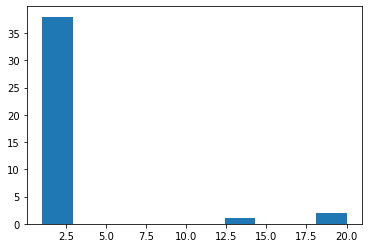

In [166]:
plt.hist(count_yourlibrary_df['track'])

(array([1.212e+03, 1.000e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  63.2, 125.4, 187.6, 249.8, 312. , 374.2, 436.4, 498.6,
        560.8, 623. ]),
 <BarContainer object of 10 artists>)

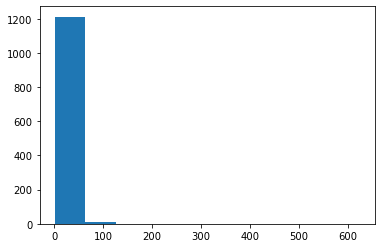

In [178]:
plt.hist(count_streaming_df['trackName'])

(array([98., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

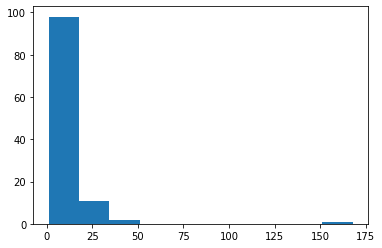

In [167]:
plt.hist(count_streaming1_df['trackName'])

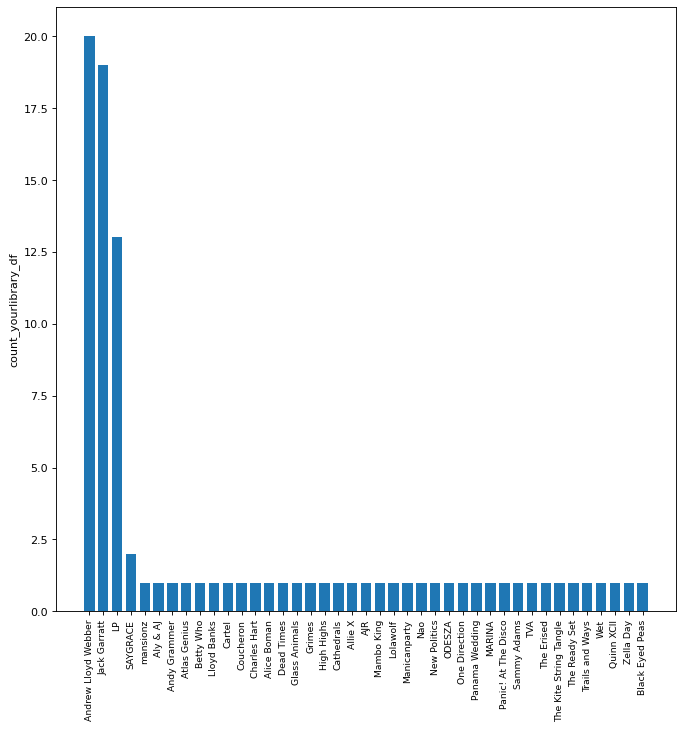

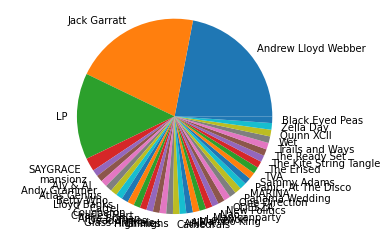

In [169]:
sortcount = count_elikes.sort_values('timestamp' ,ascending=False)
labels = sortcount['endTime'].keys()
vals = sortcount['endTime']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_yourlibrary_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

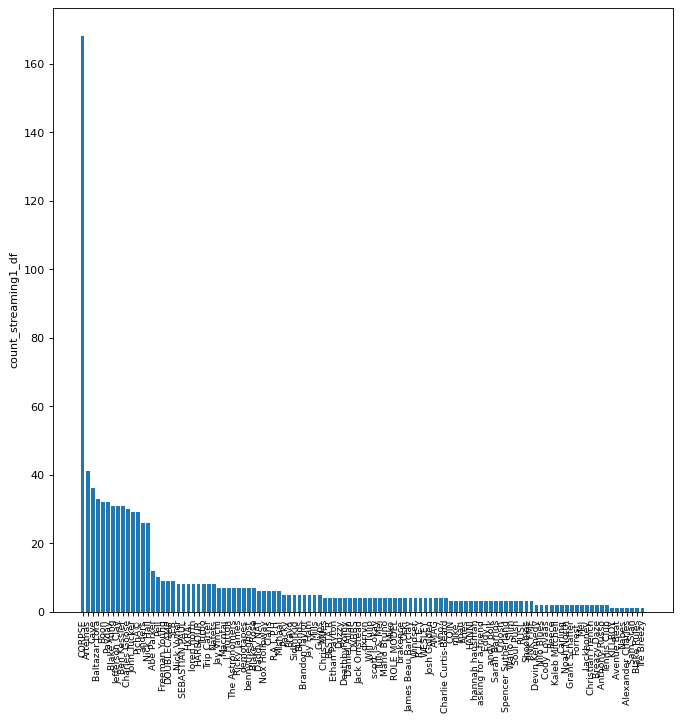

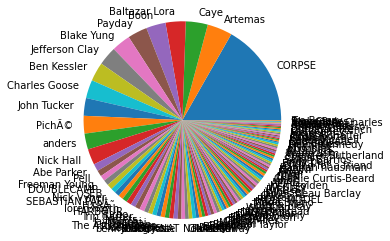

In [174]:
sortcount = count_streaming1_df.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming1_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

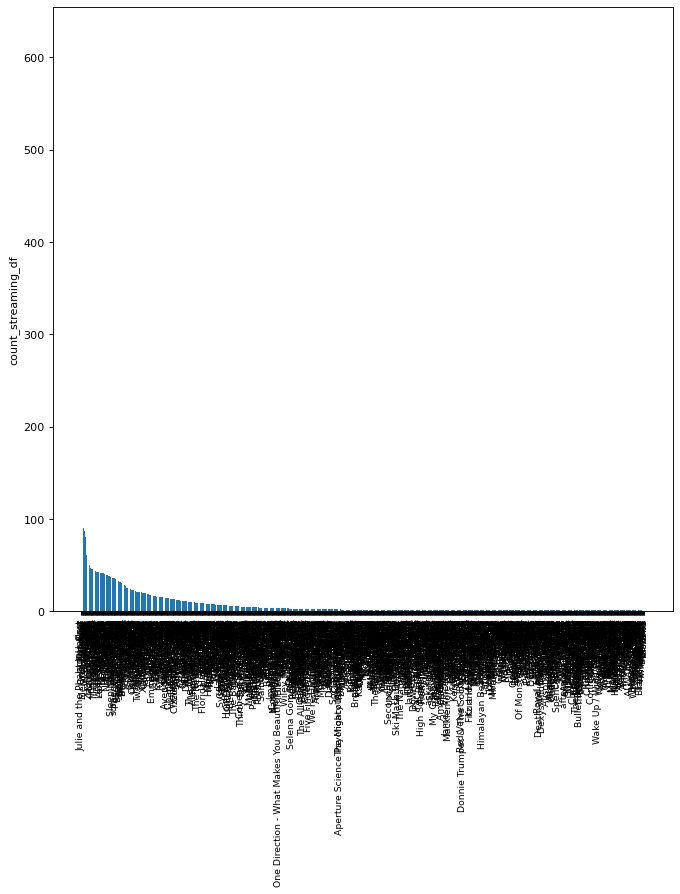

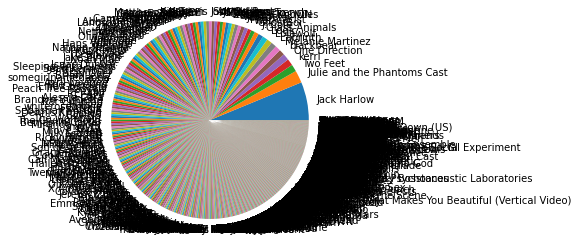

In [177]:
sortcount = count_streaming_df.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

## Analysis

There are a lot of artists that I listen to. There are also a few that I listen to frequently. I started the analyzing by counting the amount of tracks per artist after loading in the datasets. I added in some bar graphs and pie graphs which I will have to fix because of how hard some are to read. I am planning to go more in depth and compare bewtween different dates.  This will help me understand how I was feeling on a specific day or during a specific week. 

## Conclusions
##### This is not the final conclusion

I have found a lot of songs that I do not remember a lot. There are also songs that I liked a lot and listened to them repeatedly. The milliseconds of how long I listened to each song is a lot more than I thought it would be.